<a href="https://colab.research.google.com/github/uday96/EVA4-TSAI/blob/master/S8/EVA4_S8_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports and Initialization

Import required modules

In [0]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

from data.data_engine import DataEngine
from config import ModelConfig
from models.resnet import ResNet18
from train import train
from test import test
from results import plot_images, plot_graph
from utils import *

## Model Configuration and Set Seed

View model configuration and set the seed

In [2]:
# View model config
args = ModelConfig()
args.print_config()

print()
# Set seed
init_seed(args)

Model Parameters:
{ 'batch_size_cpu': 64,
  'batch_size_cuda': 64,
  'dropout': 0.15,
  'epochs': 50,
  'l1_decay': 1e-06,
  'l2_decay': 0.001,
  'lr': 0.001,
  'num_workers': 4,
  'seed': 1}

CUDA Available


## Data Loading and Visualization

Preprocess and load the cifar10 dataset. Visualise the dataset.

Files already downloaded and verified
Files already downloaded and verified
plane   dog  deer  deer


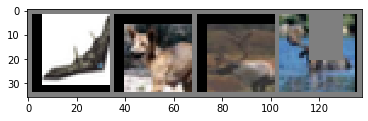

In [3]:
data = DataEngine(args)

# get some random training images
dataiter = iter(data.train_loader)
images, labels = dataiter.next()
# show images
imshow(torchvision.utils.make_grid(images[:4]))
# print labels
print(' '.join('%5s' % data.classes[labels[j]] for j in range(4)))

## Model

Create model and display model summary

In [4]:
device = which_device()
net = ResNet18(args.dropout)
model = net.to(device)
show_model_summary(model, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

## Training and Testing

Train the model and evaluate it

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=0.9)
scheduler = StepLR(optimizer, step_size=35, gamma=0.1)

def run(l1_decay=0.0, l2_decay=0.0):
  test_losses = []
  test_accs = []
  misclassified_imgs = []
  correct_imgs = []
  for epoch in range(args.epochs):
      print("EPOCH:", epoch+1)
      train(model, device, data.train_loader, criterion, optimizer, epoch, l1_decay, l2_decay)
      scheduler.step()
      test(model, device, data.test_loader, criterion, data.classes, test_losses, test_accs,
           misclassified_imgs, correct_imgs, epoch==args.epochs-1)
  return test_losses, test_accs, misclassified_imgs, correct_imgs

# train and test the model
test_losses, test_accs, misclassified_imgs, correct_imgs = run(l1_decay=args.l1_decay, l2_decay=args.l2_decay)

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 1


L2_loss=459.06011962890625 L1_loss=109365.6796875 Loss=1.6329247951507568 Batch_id=781 Accuracy=42.37: 100%|██████████| 782/782 [00:38<00:00, 23.15it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0196, Accuracy: 5536/10000 (55.36%)

EPOCH: 2


L2_loss=459.28204345703125 L1_loss=109316.4140625 Loss=1.9992767572402954 Batch_id=781 Accuracy=59.47: 100%|██████████| 782/782 [00:38<00:00, 23.45it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0154, Accuracy: 6602/10000 (66.02%)

EPOCH: 3


L2_loss=459.47930908203125 L1_loss=109266.484375 Loss=1.2912888526916504 Batch_id=781 Accuracy=67.59: 100%|██████████| 782/782 [00:38<00:00, 20.16it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0129, Accuracy: 7156/10000 (71.56%)

EPOCH: 4


L2_loss=459.6288757324219 L1_loss=109213.0078125 Loss=1.3911418914794922 Batch_id=781 Accuracy=72.58: 100%|██████████| 782/782 [00:38<00:00, 23.47it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0140, Accuracy: 7075/10000 (70.75%)

EPOCH: 5


L2_loss=459.7339782714844 L1_loss=109156.1484375 Loss=2.0401878356933594 Batch_id=781 Accuracy=75.85: 100%|██████████| 782/782 [00:38<00:00, 20.44it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0143, Accuracy: 6975/10000 (69.75%)

EPOCH: 6


L2_loss=459.8205871582031 L1_loss=109101.046875 Loss=1.273584246635437 Batch_id=781 Accuracy=78.01: 100%|██████████| 782/782 [00:38<00:00, 20.51it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0096, Accuracy: 7978/10000 (79.78%)

EPOCH: 7


L2_loss=459.8785095214844 L1_loss=109043.2265625 Loss=1.0814374685287476 Batch_id=781 Accuracy=79.59: 100%|██████████| 782/782 [00:37<00:00, 23.07it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0102, Accuracy: 7895/10000 (78.95%)

EPOCH: 8


L2_loss=459.9266052246094 L1_loss=108982.6640625 Loss=1.603361964225769 Batch_id=781 Accuracy=80.95: 100%|██████████| 782/782 [00:38<00:00, 23.14it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0086, Accuracy: 8154/10000 (81.54%)

EPOCH: 9


L2_loss=459.96240234375 L1_loss=108921.28125 Loss=1.5973484516143799 Batch_id=781 Accuracy=82.31: 100%|██████████| 782/782 [00:38<00:00, 20.46it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0078, Accuracy: 8328/10000 (83.28%)

EPOCH: 10


L2_loss=459.9872131347656 L1_loss=108859.8203125 Loss=1.059633493423462 Batch_id=781 Accuracy=83.27: 100%|██████████| 782/782 [00:37<00:00, 20.64it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0083, Accuracy: 8294/10000 (82.94%)

EPOCH: 11


L2_loss=459.9941711425781 L1_loss=108796.921875 Loss=0.8335458040237427 Batch_id=781 Accuracy=84.21: 100%|██████████| 782/782 [00:37<00:00, 20.61it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0072, Accuracy: 8480/10000 (84.80%)

EPOCH: 12


L2_loss=460.0048828125 L1_loss=108732.4609375 Loss=1.3486188650131226 Batch_id=781 Accuracy=84.89: 100%|██████████| 782/782 [00:38<00:00, 20.54it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 85 %
Accuracy of   car : 98 %
Accuracy of  bird : 80 %
Accuracy of   cat : 79 %
Accuracy of  deer : 92 %
Accuracy of   dog : 76 %
Accuracy of  frog : 86 %
Accuracy of horse : 90 %
Accuracy of  ship : 89 %
Accuracy of truck : 94 %

Test set: Average loss: 0.0070, Accuracy: 8513/10000 (85.13%)

EPOCH: 13


L2_loss=460.0093078613281 L1_loss=108669.9375 Loss=1.4914329051971436 Batch_id=781 Accuracy=85.83: 100%|██████████| 782/782 [00:37<00:00, 23.18it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0075, Accuracy: 8473/10000 (84.73%)

EPOCH: 14


L2_loss=460.0156555175781 L1_loss=108608.3671875 Loss=0.9949785470962524 Batch_id=781 Accuracy=86.30: 100%|██████████| 782/782 [00:37<00:00, 20.63it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 89 %
Accuracy of   car : 100 %
Accuracy of  bird : 75 %
Accuracy of   cat : 69 %
Accuracy of  deer : 84 %
Accuracy of   dog : 77 %
Accuracy of  frog : 94 %
Accuracy of horse : 93 %
Accuracy of  ship : 89 %
Accuracy of truck : 89 %

Test set: Average loss: 0.0068, Accuracy: 8552/10000 (85.52%)

EPOCH: 15


L2_loss=460.0177307128906 L1_loss=108545.9375 Loss=0.6528851985931396 Batch_id=781 Accuracy=87.10: 100%|██████████| 782/782 [00:38<00:00, 20.50it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 93 %
Accuracy of   car : 94 %
Accuracy of  bird : 84 %
Accuracy of   cat : 66 %
Accuracy of  deer : 89 %
Accuracy of   dog : 83 %
Accuracy of  frog : 100 %
Accuracy of horse : 85 %
Accuracy of  ship : 100 %
Accuracy of truck : 89 %

Test set: Average loss: 0.0066, Accuracy: 8611/10000 (86.11%)

EPOCH: 16


L2_loss=460.0087585449219 L1_loss=108481.4140625 Loss=0.6488955616950989 Batch_id=781 Accuracy=87.72: 100%|██████████| 782/782 [00:38<00:00, 20.52it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 81 %
Accuracy of   car : 94 %
Accuracy of  bird : 89 %
Accuracy of   cat : 66 %
Accuracy of  deer : 83 %
Accuracy of   dog : 86 %
Accuracy of  frog : 86 %
Accuracy of horse : 90 %
Accuracy of  ship : 90 %
Accuracy of truck : 95 %

Test set: Average loss: 0.0069, Accuracy: 8571/10000 (85.71%)

EPOCH: 17


L2_loss=459.9893798828125 L1_loss=108418.1796875 Loss=1.1684437990188599 Batch_id=781 Accuracy=88.03: 100%|██████████| 782/782 [00:38<00:00, 20.38it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 89 %
Accuracy of   car : 94 %
Accuracy of  bird : 85 %
Accuracy of   cat : 70 %
Accuracy of  deer : 90 %
Accuracy of   dog : 68 %
Accuracy of  frog : 87 %
Accuracy of horse : 90 %
Accuracy of  ship : 96 %
Accuracy of truck : 96 %

Test set: Average loss: 0.0069, Accuracy: 8590/10000 (85.90%)

EPOCH: 18


L2_loss=459.96014404296875 L1_loss=108355.3125 Loss=0.8234841823577881 Batch_id=781 Accuracy=88.68: 100%|██████████| 782/782 [00:37<00:00, 20.66it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 79 %
Accuracy of   car : 92 %
Accuracy of  bird : 85 %
Accuracy of   cat : 81 %
Accuracy of  deer : 80 %
Accuracy of   dog : 84 %
Accuracy of  frog : 81 %
Accuracy of horse : 90 %
Accuracy of  ship : 100 %
Accuracy of truck : 89 %

Test set: Average loss: 0.0065, Accuracy: 8642/10000 (86.42%)

EPOCH: 19


L2_loss=459.93328857421875 L1_loss=108290.453125 Loss=0.9008156061172485 Batch_id=781 Accuracy=89.09: 100%|██████████| 782/782 [00:37<00:00, 22.91it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 94 %
Accuracy of   car : 96 %
Accuracy of  bird : 69 %
Accuracy of   cat : 73 %
Accuracy of  deer : 87 %
Accuracy of   dog : 89 %
Accuracy of  frog : 85 %
Accuracy of horse : 90 %
Accuracy of  ship : 96 %
Accuracy of truck : 85 %

Test set: Average loss: 0.0064, Accuracy: 8649/10000 (86.49%)

EPOCH: 20


L2_loss=459.9003601074219 L1_loss=108226.1796875 Loss=1.2112244367599487 Batch_id=781 Accuracy=89.41: 100%|██████████| 782/782 [00:37<00:00, 23.15it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 94 %
Accuracy of   car : 100 %
Accuracy of  bird : 90 %
Accuracy of   cat : 70 %
Accuracy of  deer : 82 %
Accuracy of   dog : 77 %
Accuracy of  frog : 91 %
Accuracy of horse : 96 %
Accuracy of  ship : 92 %
Accuracy of truck : 84 %

Test set: Average loss: 0.0063, Accuracy: 8735/10000 (87.35%)

EPOCH: 21


L2_loss=459.851806640625 L1_loss=108163.203125 Loss=0.6806862354278564 Batch_id=781 Accuracy=89.75: 100%|██████████| 782/782 [00:37<00:00, 20.71it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 92 %
Accuracy of   car : 92 %
Accuracy of  bird : 93 %
Accuracy of   cat : 73 %
Accuracy of  deer : 77 %
Accuracy of   dog : 87 %
Accuracy of  frog : 72 %
Accuracy of horse : 89 %
Accuracy of  ship : 94 %
Accuracy of truck : 95 %

Test set: Average loss: 0.0066, Accuracy: 8649/10000 (86.49%)

EPOCH: 22


L2_loss=459.8094787597656 L1_loss=108096.6796875 Loss=0.8255466818809509 Batch_id=781 Accuracy=90.16: 100%|██████████| 782/782 [00:37<00:00, 20.66it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 94 %
Accuracy of   car : 98 %
Accuracy of  bird : 89 %
Accuracy of   cat : 86 %
Accuracy of  deer : 91 %
Accuracy of   dog : 79 %
Accuracy of  frog : 85 %
Accuracy of horse : 92 %
Accuracy of  ship : 95 %
Accuracy of truck : 89 %

Test set: Average loss: 0.0054, Accuracy: 8876/10000 (88.76%)

EPOCH: 23


L2_loss=459.76190185546875 L1_loss=108031.8515625 Loss=1.191443920135498 Batch_id=781 Accuracy=90.58: 100%|██████████| 782/782 [00:37<00:00, 20.62it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 92 %
Accuracy of   car : 93 %
Accuracy of  bird : 88 %
Accuracy of   cat : 81 %
Accuracy of  deer : 93 %
Accuracy of   dog : 79 %
Accuracy of  frog : 86 %
Accuracy of horse : 85 %
Accuracy of  ship : 98 %
Accuracy of truck : 96 %

Test set: Average loss: 0.0060, Accuracy: 8799/10000 (87.99%)

EPOCH: 24


L2_loss=459.70123291015625 L1_loss=107967.234375 Loss=0.8437435626983643 Batch_id=781 Accuracy=90.73: 100%|██████████| 782/782 [00:38<00:00, 20.49it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 92 %
Accuracy of   car : 95 %
Accuracy of  bird : 72 %
Accuracy of   cat : 71 %
Accuracy of  deer : 86 %
Accuracy of   dog : 84 %
Accuracy of  frog : 91 %
Accuracy of horse : 86 %
Accuracy of  ship : 98 %
Accuracy of truck : 97 %

Test set: Average loss: 0.0058, Accuracy: 8860/10000 (88.60%)

EPOCH: 25


L2_loss=459.63006591796875 L1_loss=107897.1640625 Loss=0.7634183168411255 Batch_id=781 Accuracy=91.11: 100%|██████████| 782/782 [00:37<00:00, 23.05it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 93 %
Accuracy of   car : 98 %
Accuracy of  bird : 85 %
Accuracy of   cat : 77 %
Accuracy of  deer : 92 %
Accuracy of   dog : 78 %
Accuracy of  frog : 97 %
Accuracy of horse : 93 %
Accuracy of  ship : 98 %
Accuracy of truck : 85 %

Test set: Average loss: 0.0056, Accuracy: 8827/10000 (88.27%)

EPOCH: 26


L2_loss=459.5657653808594 L1_loss=107830.8984375 Loss=1.1716402769088745 Batch_id=781 Accuracy=91.36: 100%|██████████| 782/782 [00:37<00:00, 20.74it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 88 %
Accuracy of   car : 91 %
Accuracy of  bird : 78 %
Accuracy of   cat : 76 %
Accuracy of  deer : 83 %
Accuracy of   dog : 86 %
Accuracy of  frog : 93 %
Accuracy of horse : 92 %
Accuracy of  ship : 98 %
Accuracy of truck : 100 %

Test set: Average loss: 0.0061, Accuracy: 8787/10000 (87.87%)

EPOCH: 27


L2_loss=459.4831848144531 L1_loss=107762.4921875 Loss=0.7245936393737793 Batch_id=781 Accuracy=92.01: 100%|██████████| 782/782 [00:37<00:00, 20.74it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 94 %
Accuracy of   car : 98 %
Accuracy of  bird : 63 %
Accuracy of   cat : 82 %
Accuracy of  deer : 95 %
Accuracy of   dog : 76 %
Accuracy of  frog : 89 %
Accuracy of horse : 87 %
Accuracy of  ship : 96 %
Accuracy of truck : 83 %

Test set: Average loss: 0.0062, Accuracy: 8792/10000 (87.92%)

EPOCH: 28


L2_loss=459.4046630859375 L1_loss=107696.671875 Loss=0.9511756896972656 Batch_id=781 Accuracy=91.83: 100%|██████████| 782/782 [00:37<00:00, 22.64it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 92 %
Accuracy of   car : 91 %
Accuracy of  bird : 78 %
Accuracy of   cat : 73 %
Accuracy of  deer : 87 %
Accuracy of   dog : 81 %
Accuracy of  frog : 93 %
Accuracy of horse : 79 %
Accuracy of  ship : 98 %
Accuracy of truck : 84 %

Test set: Average loss: 0.0062, Accuracy: 8749/10000 (87.49%)

EPOCH: 29


L2_loss=459.32647705078125 L1_loss=107628.8828125 Loss=0.811724066734314 Batch_id=781 Accuracy=92.28: 100%|██████████| 782/782 [00:38<00:00, 22.82it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 90 %
Accuracy of   car : 96 %
Accuracy of  bird : 78 %
Accuracy of   cat : 85 %
Accuracy of  deer : 94 %
Accuracy of   dog : 72 %
Accuracy of  frog : 97 %
Accuracy of horse : 96 %
Accuracy of  ship : 92 %
Accuracy of truck : 90 %

Test set: Average loss: 0.0052, Accuracy: 8984/10000 (89.84%)

EPOCH: 30


L2_loss=459.23870849609375 L1_loss=107557.515625 Loss=0.6212705373764038 Batch_id=781 Accuracy=92.61: 100%|██████████| 782/782 [00:38<00:00, 23.02it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 85 %
Accuracy of   car : 91 %
Accuracy of  bird : 66 %
Accuracy of   cat : 64 %
Accuracy of  deer : 82 %
Accuracy of   dog : 90 %
Accuracy of  frog : 91 %
Accuracy of horse : 94 %
Accuracy of  ship : 89 %
Accuracy of truck : 96 %

Test set: Average loss: 0.0058, Accuracy: 8850/10000 (88.50%)

EPOCH: 31


L2_loss=459.1498107910156 L1_loss=107488.3046875 Loss=0.969757080078125 Batch_id=781 Accuracy=92.50: 100%|██████████| 782/782 [00:38<00:00, 20.12it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 90 %
Accuracy of   car : 96 %
Accuracy of  bird : 85 %
Accuracy of   cat : 95 %
Accuracy of  deer : 91 %
Accuracy of   dog : 78 %
Accuracy of  frog : 88 %
Accuracy of horse : 90 %
Accuracy of  ship : 92 %
Accuracy of truck : 91 %

Test set: Average loss: 0.0055, Accuracy: 8925/10000 (89.25%)

EPOCH: 32


L2_loss=459.057373046875 L1_loss=107418.7578125 Loss=0.7176534533500671 Batch_id=781 Accuracy=93.04: 100%|██████████| 782/782 [00:38<00:00, 20.13it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 83 %
Accuracy of   car : 98 %
Accuracy of  bird : 94 %
Accuracy of   cat : 73 %
Accuracy of  deer : 96 %
Accuracy of   dog : 80 %
Accuracy of  frog : 93 %
Accuracy of horse : 91 %
Accuracy of  ship : 93 %
Accuracy of truck : 91 %

Test set: Average loss: 0.0056, Accuracy: 8947/10000 (89.47%)

EPOCH: 33


L2_loss=458.96380615234375 L1_loss=107351.609375 Loss=0.9211572408676147 Batch_id=781 Accuracy=93.02: 100%|██████████| 782/782 [00:38<00:00, 23.15it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 81 %
Accuracy of   car : 92 %
Accuracy of  bird : 90 %
Accuracy of   cat : 75 %
Accuracy of  deer : 91 %
Accuracy of   dog : 90 %
Accuracy of  frog : 92 %
Accuracy of horse : 89 %
Accuracy of  ship : 96 %
Accuracy of truck : 96 %

Test set: Average loss: 0.0055, Accuracy: 8904/10000 (89.04%)

EPOCH: 34


L2_loss=458.86737060546875 L1_loss=107281.578125 Loss=0.9463706016540527 Batch_id=781 Accuracy=93.26: 100%|██████████| 782/782 [00:38<00:00, 20.12it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 90 %
Accuracy of   car : 96 %
Accuracy of  bird : 82 %
Accuracy of   cat : 77 %
Accuracy of  deer : 85 %
Accuracy of   dog : 86 %
Accuracy of  frog : 86 %
Accuracy of horse : 90 %
Accuracy of  ship : 88 %
Accuracy of truck : 93 %

Test set: Average loss: 0.0056, Accuracy: 8930/10000 (89.30%)

EPOCH: 35


L2_loss=458.7618713378906 L1_loss=107208.5703125 Loss=0.9029390811920166 Batch_id=781 Accuracy=93.62: 100%|██████████| 782/782 [00:37<00:00, 20.62it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 90 %
Accuracy of   car : 92 %
Accuracy of  bird : 84 %
Accuracy of   cat : 70 %
Accuracy of  deer : 95 %
Accuracy of   dog : 87 %
Accuracy of  frog : 95 %
Accuracy of horse : 91 %
Accuracy of  ship : 90 %
Accuracy of truck : 93 %

Test set: Average loss: 0.0057, Accuracy: 8923/10000 (89.23%)

EPOCH: 36


L2_loss=458.71746826171875 L1_loss=107192.5234375 Loss=0.6138044595718384 Batch_id=781 Accuracy=95.41: 100%|██████████| 782/782 [00:37<00:00, 23.08it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 95 %
Accuracy of   car : 96 %
Accuracy of  bird : 91 %
Accuracy of   cat : 83 %
Accuracy of  deer : 91 %
Accuracy of   dog : 89 %
Accuracy of  frog : 96 %
Accuracy of horse : 88 %
Accuracy of  ship : 92 %
Accuracy of truck : 92 %

Test set: Average loss: 0.0043, Accuracy: 9155/10000 (91.55%)

EPOCH: 37


L2_loss=458.6791076660156 L1_loss=107176.4765625 Loss=0.647718071937561 Batch_id=781 Accuracy=95.98: 100%|██████████| 782/782 [00:37<00:00, 20.65it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 92 %
Accuracy of   car : 97 %
Accuracy of  bird : 83 %
Accuracy of   cat : 81 %
Accuracy of  deer : 95 %
Accuracy of   dog : 85 %
Accuracy of  frog : 93 %
Accuracy of horse : 93 %
Accuracy of  ship : 95 %
Accuracy of truck : 95 %

Test set: Average loss: 0.0042, Accuracy: 9189/10000 (91.89%)

EPOCH: 38


L2_loss=458.6412658691406 L1_loss=107160.4609375 Loss=0.7235362529754639 Batch_id=781 Accuracy=96.14: 100%|██████████| 782/782 [00:38<00:00, 20.54it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 96 %
Accuracy of   car : 93 %
Accuracy of  bird : 89 %
Accuracy of   cat : 81 %
Accuracy of  deer : 90 %
Accuracy of   dog : 87 %
Accuracy of  frog : 93 %
Accuracy of horse : 92 %
Accuracy of  ship : 100 %
Accuracy of truck : 98 %

Test set: Average loss: 0.0042, Accuracy: 9189/10000 (91.89%)

EPOCH: 39


L2_loss=458.60504150390625 L1_loss=107144.4453125 Loss=0.8070851564407349 Batch_id=781 Accuracy=96.23: 100%|██████████| 782/782 [00:37<00:00, 23.47it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 94 %
Accuracy of   car : 98 %
Accuracy of  bird : 94 %
Accuracy of   cat : 73 %
Accuracy of  deer : 88 %
Accuracy of   dog : 85 %
Accuracy of  frog : 92 %
Accuracy of horse : 92 %
Accuracy of  ship : 91 %
Accuracy of truck : 95 %

Test set: Average loss: 0.0042, Accuracy: 9216/10000 (92.16%)

EPOCH: 40


L2_loss=458.56890869140625 L1_loss=107128.5703125 Loss=0.6407759189605713 Batch_id=781 Accuracy=96.27: 100%|██████████| 782/782 [00:38<00:00, 22.65it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 95 %
Accuracy of   car : 96 %
Accuracy of  bird : 83 %
Accuracy of   cat : 70 %
Accuracy of  deer : 87 %
Accuracy of   dog : 86 %
Accuracy of  frog : 95 %
Accuracy of horse : 98 %
Accuracy of  ship : 96 %
Accuracy of truck : 91 %

Test set: Average loss: 0.0043, Accuracy: 9188/10000 (91.88%)

EPOCH: 41


L2_loss=458.53350830078125 L1_loss=107112.5078125 Loss=0.6056332588195801 Batch_id=781 Accuracy=96.46: 100%|██████████| 782/782 [00:38<00:00, 20.23it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 93 %
Accuracy of   car : 96 %
Accuracy of  bird : 93 %
Accuracy of   cat : 80 %
Accuracy of  deer : 94 %
Accuracy of   dog : 84 %
Accuracy of  frog : 88 %
Accuracy of horse : 98 %
Accuracy of  ship : 96 %
Accuracy of truck : 93 %

Test set: Average loss: 0.0042, Accuracy: 9204/10000 (92.04%)

EPOCH: 42


L2_loss=458.49761962890625 L1_loss=107096.40625 Loss=0.9353477954864502 Batch_id=781 Accuracy=96.46: 100%|██████████| 782/782 [00:38<00:00, 23.52it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 97 %
Accuracy of   car : 96 %
Accuracy of  bird : 85 %
Accuracy of   cat : 88 %
Accuracy of  deer : 89 %
Accuracy of   dog : 93 %
Accuracy of  frog : 89 %
Accuracy of horse : 87 %
Accuracy of  ship : 89 %
Accuracy of truck : 91 %

Test set: Average loss: 0.0042, Accuracy: 9200/10000 (92.00%)

EPOCH: 43


L2_loss=458.46234130859375 L1_loss=107080.421875 Loss=0.649635910987854 Batch_id=781 Accuracy=96.67: 100%|██████████| 782/782 [00:38<00:00, 20.28it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 95 %
Accuracy of   car : 98 %
Accuracy of  bird : 85 %
Accuracy of   cat : 88 %
Accuracy of  deer : 94 %
Accuracy of   dog : 88 %
Accuracy of  frog : 95 %
Accuracy of horse : 95 %
Accuracy of  ship : 97 %
Accuracy of truck : 92 %

Test set: Average loss: 0.0043, Accuracy: 9192/10000 (91.92%)

EPOCH: 44


L2_loss=458.4274597167969 L1_loss=107064.4375 Loss=0.6278982758522034 Batch_id=781 Accuracy=96.63: 100%|██████████| 782/782 [00:39<00:00, 22.09it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 85 %
Accuracy of   car : 93 %
Accuracy of  bird : 88 %
Accuracy of   cat : 85 %
Accuracy of  deer : 86 %
Accuracy of   dog : 96 %
Accuracy of  frog : 95 %
Accuracy of horse : 89 %
Accuracy of  ship : 95 %
Accuracy of truck : 94 %

Test set: Average loss: 0.0043, Accuracy: 9201/10000 (92.01%)

EPOCH: 45


L2_loss=458.3937683105469 L1_loss=107048.2890625 Loss=0.8331664800643921 Batch_id=781 Accuracy=96.63: 100%|██████████| 782/782 [00:39<00:00, 19.71it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 98 %
Accuracy of   car : 98 %
Accuracy of  bird : 91 %
Accuracy of   cat : 75 %
Accuracy of  deer : 94 %
Accuracy of   dog : 92 %
Accuracy of  frog : 98 %
Accuracy of horse : 91 %
Accuracy of  ship : 95 %
Accuracy of truck : 95 %

Test set: Average loss: 0.0042, Accuracy: 9219/10000 (92.19%)

EPOCH: 46


L2_loss=458.3591003417969 L1_loss=107032.3984375 Loss=0.7287720441818237 Batch_id=781 Accuracy=96.58: 100%|██████████| 782/782 [00:39<00:00, 20.04it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 87 %
Accuracy of   car : 98 %
Accuracy of  bird : 90 %
Accuracy of   cat : 95 %
Accuracy of  deer : 92 %
Accuracy of   dog : 87 %
Accuracy of  frog : 96 %
Accuracy of horse : 92 %
Accuracy of  ship : 97 %
Accuracy of truck : 98 %

Test set: Average loss: 0.0043, Accuracy: 9181/10000 (91.81%)

EPOCH: 47


L2_loss=458.3252868652344 L1_loss=107016.5234375 Loss=0.7306802868843079 Batch_id=781 Accuracy=96.70: 100%|██████████| 782/782 [00:39<00:00, 20.02it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 96 %
Accuracy of   car : 100 %
Accuracy of  bird : 84 %
Accuracy of   cat : 82 %
Accuracy of  deer : 98 %
Accuracy of   dog : 94 %
Accuracy of  frog : 95 %
Accuracy of horse : 96 %
Accuracy of  ship : 100 %
Accuracy of truck : 92 %

Test set: Average loss: 0.0044, Accuracy: 9215/10000 (92.15%)

EPOCH: 48


L2_loss=458.2920227050781 L1_loss=107000.5625 Loss=0.7942687273025513 Batch_id=781 Accuracy=96.99: 100%|██████████| 782/782 [00:38<00:00, 22.51it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 90 %
Accuracy of   car : 93 %
Accuracy of  bird : 85 %
Accuracy of   cat : 75 %
Accuracy of  deer : 95 %
Accuracy of   dog : 90 %
Accuracy of  frog : 93 %
Accuracy of horse : 95 %
Accuracy of  ship : 96 %
Accuracy of truck : 94 %

Test set: Average loss: 0.0043, Accuracy: 9201/10000 (92.01%)

EPOCH: 49


L2_loss=458.2591552734375 L1_loss=106984.6015625 Loss=0.7068256139755249 Batch_id=781 Accuracy=96.73: 100%|██████████| 782/782 [00:39<00:00, 19.90it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 93 %
Accuracy of   car : 96 %
Accuracy of  bird : 87 %
Accuracy of   cat : 84 %
Accuracy of  deer : 93 %
Accuracy of   dog : 80 %
Accuracy of  frog : 95 %
Accuracy of horse : 96 %
Accuracy of  ship : 98 %
Accuracy of truck : 98 %

Test set: Average loss: 0.0043, Accuracy: 9209/10000 (92.09%)

EPOCH: 50


L2_loss=458.2269592285156 L1_loss=106968.6015625 Loss=0.6516260504722595 Batch_id=781 Accuracy=96.93: 100%|██████████| 782/782 [00:40<00:00, 19.17it/s]



Accuracy of plane : 95 %
Accuracy of   car : 90 %
Accuracy of  bird : 90 %
Accuracy of   cat : 92 %
Accuracy of  deer : 95 %
Accuracy of   dog : 89 %
Accuracy of  frog : 96 %
Accuracy of horse : 87 %
Accuracy of  ship : 94 %
Accuracy of truck : 94 %

Test set: Average loss: 0.0043, Accuracy: 9203/10000 (92.03%)



## Plot Validation Loss

Plot the change in validation loss vs epochs

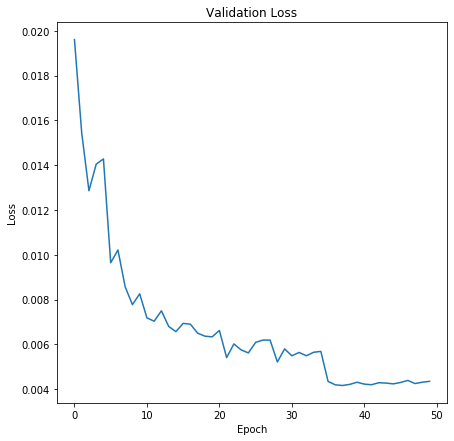

In [6]:
plot_graph(test_losses, "Loss")

## Plot Validation Accuracy

Plot the change in validation accracy vs epochs

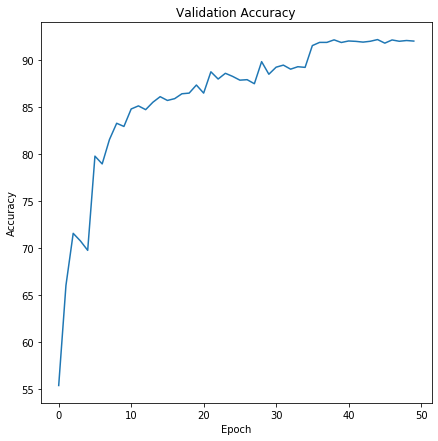

In [7]:
plot_graph(test_accs, "Accuracy")

## Correct Predicted Images

Display 25 correctly classified test images

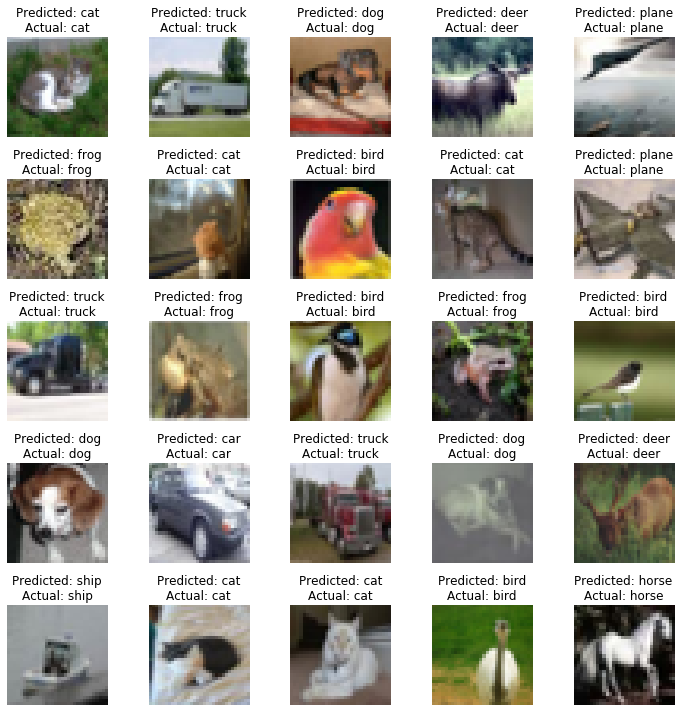

In [8]:
plot_images(correct_imgs, data.classes, "correct_imgs.png")

## Misclassified Images

Display 25 misclassified test images

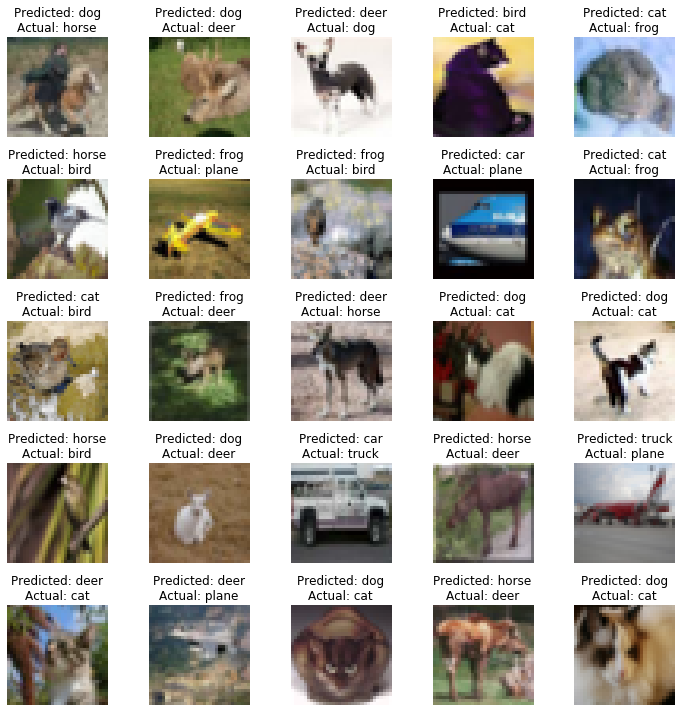

In [10]:
plot_images(misclassified_imgs, data.classes, "misclassified_imgs.png")